## loading necessary libraries and data 

In [2]:
#loading all the necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set()
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [3]:
#using the panda library to load the data
data=pd.read_csv('BMIF_803_Assignment_5_data.csv')

In [4]:
#visualize the data
data

,Patient,SMAD4,TP53,genes_altered_gt_4,OS_months,"OS_status (death=1, alive=0)",GLCM15,GLCM16,RLM2,IH3,...,LBP103,LBP105,FD1_11,FD1_29,FD1_30,FD1_41,FD1_44,ACM1_1,ACM1_2,ACM1_3
0,5001,0,1,0,32,0,1537.178269,20786.027650,20.846151,0.058762,...,0.002563,0.002118,140.874738,85.041126,36.000000,148.265799,167.786491,0.006899,35.581687,0.040513
1,5002,1,0,0,28,0,3238.837432,58714.389330,27.085880,0.065277,...,0.001917,0.001917,166.133153,101.466957,24.600000,173.197549,193.321554,0.006750,34.204213,0.073583
2,5003,1,1,1,32,0,1449.381439,20204.802550,22.525364,0.037621,...,0.000648,0.000648,147.341698,76.929388,17.500000,155.590126,178.560277,0.011719,30.247168,0.088875
3,5004,1,1,0,5,1,808.426463,10022.371090,17.994915,0.097021,...,0.005259,0.005259,129.677050,57.147222,13.000000,136.902768,166.091087,0.009607,30.282771,0.008632
4,5005,0,0,1,30,0,1897.336017,27887.793120,23.066161,0.095995,...,0.000530,0.000530,150.941960,90.556813,48.900000,159.701215,179.797452,0.005926,33.104422,0.067333
5,5006,1,1,0,31,0,1143.384164,15333.522880,17.425245,0.191919,...,0.004250,0.003448,127.012583,76.032826,41.000000,133.613384,151.456447,0.005861,39.221267,0.036104
6,5007,1,1,0,29,0,963.233436,11928.110880,18.300306,-0.017525,...,0.007660,0.007660,132.346736,59.853977,13.250000,138.257685,161.053977,0.009381,35.103781,0.062032
7,5008,0,0,1,30,0,3522.316626,57437.540080,27.544492,-0.140245,...,0.001759,0.001449,163.698096,114.508188,40.333333,170.541765,186.995390,0.005825,33.034479,0.037961
8,5009,0,1,1,7,1,1768.428128,26353.790340,23.238776,0.048493,...,0.002776,0.002776,153.695078,84.363375,38.666667,161.926749,185.279712,0.005838,37.203019,0.028118
9,5010,0,1,1,27,0,1140.142199,16123.320260,20.390301,0.345098,...,0.004403,0.004403,139.468586,73.438131,12.500000,152.513622,176.468452,0.011692,37.282185,0.111196


In [5]:
#this checks if our datasets have any missing variables 
data.isnull().sum()

Patient                         0
SMAD4                           0
TP53                            0
genes_altered_gt_4              0
OS_months                       0
OS_status (death=1, alive=0)    0
GLCM15                          0
GLCM16                          0
RLM2                            0
IH3                             0
IH4                             0
LBP10                           0
LBP11                           0
LBP13                           0
LBP16                           0
LBP29                           0
LBP30                           0
LBP37                           0
LBP42                           0
LBP43                           0
LBP49                           0
LBP52                           0
LBP53                           0
LBP54                           0
LBP87                           0
LBP88                           0
LBP89                           0
LBP90                           0
LBP91                           0
LBP98         

In [6]:
#It is clear that the patient ID column is not usefl so we need to remove it
data.drop(['Patient'], axis=1)

,SMAD4,TP53,genes_altered_gt_4,OS_months,"OS_status (death=1, alive=0)",GLCM15,GLCM16,RLM2,IH3,IH4,...,LBP103,LBP105,FD1_11,FD1_29,FD1_30,FD1_41,FD1_44,ACM1_1,ACM1_2,ACM1_3
0,0,1,0,32,0,1537.178269,20786.027650,20.846151,0.058762,2.935889,...,0.002563,0.002118,140.874738,85.041126,36.000000,148.265799,167.786491,0.006899,35.581687,0.040513
1,1,0,0,28,0,3238.837432,58714.389330,27.085880,0.065277,2.652419,...,0.001917,0.001917,166.133153,101.466957,24.600000,173.197549,193.321554,0.006750,34.204213,0.073583
2,1,1,1,32,0,1449.381439,20204.802550,22.525364,0.037621,2.795032,...,0.000648,0.000648,147.341698,76.929388,17.500000,155.590126,178.560277,0.011719,30.247168,0.088875
3,1,1,0,5,1,808.426463,10022.371090,17.994915,0.097021,3.121587,...,0.005259,0.005259,129.677050,57.147222,13.000000,136.902768,166.091087,0.009607,30.282771,0.008632
4,0,0,1,30,0,1897.336017,27887.793120,23.066161,0.095995,3.012609,...,0.000530,0.000530,150.941960,90.556813,48.900000,159.701215,179.797452,0.005926,33.104422,0.067333
5,1,1,0,31,0,1143.384164,15333.522880,17.425245,0.191919,2.901349,...,0.004250,0.003448,127.012583,76.032826,41.000000,133.613384,151.456447,0.005861,39.221267,0.036104
6,1,1,0,29,0,963.233436,11928.110880,18.300306,-0.017525,3.042864,...,0.007660,0.007660,132.346736,59.853977,13.250000,138.257685,161.053977,0.009381,35.103781,0.062032
7,0,0,1,30,0,3522.316626,57437.540080,27.544492,-0.140245,3.549349,...,0.001759,0.001449,163.698096,114.508188,40.333333,170.541765,186.995390,0.005825,33.034479,0.037961
8,0,1,1,7,1,1768.428128,26353.790340,23.238776,0.048493,2.930891,...,0.002776,0.002776,153.695078,84.363375,38.666667,161.926749,185.279712,0.005838,37.203019,0.028118
9,0,1,1,27,0,1140.142199,16123.320260,20.390301,0.345098,3.274611,...,0.004403,0.004403,139.468586,73.438131,12.500000,152.513622,176.468452,0.011692,37.282185,0.111196


In [7]:
#describe()function is very powerful on providing an excellent statistical summary table 
data.describe()

,Patient,SMAD4,TP53,genes_altered_gt_4,OS_months,"OS_status (death=1, alive=0)",GLCM15,GLCM16,RLM2,IH3,...,LBP103,LBP105,FD1_11,FD1_29,FD1_30,FD1_41,FD1_44,ACM1_1,ACM1_2,ACM1_3
count,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,5019.485714,0.457143,0.60000,0.428571,18.742857,0.171429,2208.564883,35017.849035,23.389188,-0.036481,...,0.002488,0.002420,149.605576,87.156733,30.451923,157.915812,178.700432,0.007755,34.827686,0.062483
std,11.456751,0.505433,0.49705,0.502096,8.250999,0.382385,1152.965203,22176.273252,5.014018,0.221637,...,0.001767,0.001865,20.528042,18.647608,15.562572,20.934685,22.422374,0.003143,4.157362,0.034243
min,5001.000000,0.000000,0.00000,0.000000,3.000000,0.000000,126.645875,849.400017,8.088148,-0.444077,...,0.000000,0.000000,73.246958,41.149084,6.500000,78.638684,88.521554,0.004912,23.595139,-0.003537
25%,5009.500000,0.000000,0.00000,0.000000,15.000000,0.000000,1366.262027,18263.773975,20.618226,-0.201171,...,0.001612,0.001409,140.378056,76.481107,17.083333,150.480520,173.408811,0.005769,32.010457,0.039250
50%,5020.000000,0.000000,1.00000,0.000000,18.000000,0.000000,2006.811674,29706.318510,23.770622,-0.017525,...,0.002444,0.002136,153.695078,86.622998,27.000000,162.933718,182.859675,0.006405,35.914374,0.062032
75%,5028.500000,1.000000,1.00000,1.000000,23.500000,0.000000,2957.696377,46549.474010,26.155019,0.087253,...,0.003428,0.003468,161.627630,101.701859,41.458333,169.118323,189.981185,0.009376,37.765596,0.084141
max,5039.000000,1.000000,1.00000,1.000000,32.000000,1.000000,5337.911207,100110.406000,33.222144,0.414572,...,0.007660,0.007660,181.180386,130.272342,64.125000,191.498544,207.813248,0.019267,42.584953,0.143508


## briefly have some idea how our data look like

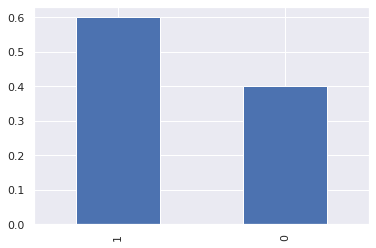

In [8]:
# in this exercise we are interested in SMAD4 data set
data['TP53'].value_counts(normalize=True).plot.bar()

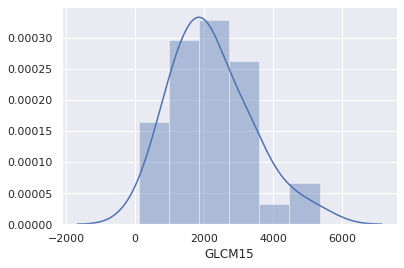

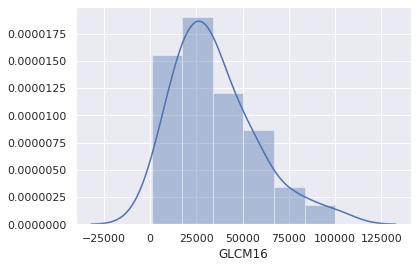

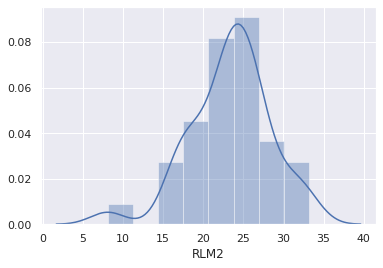

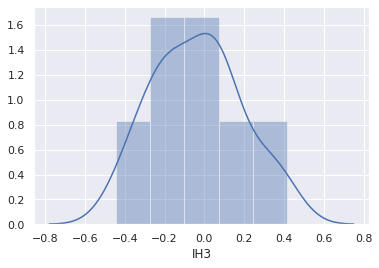

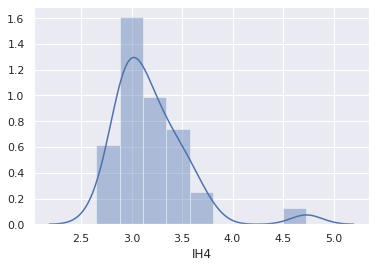

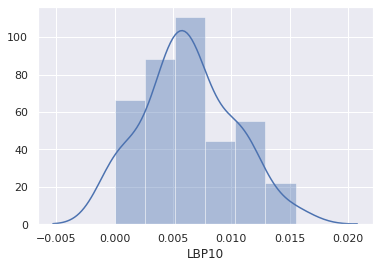

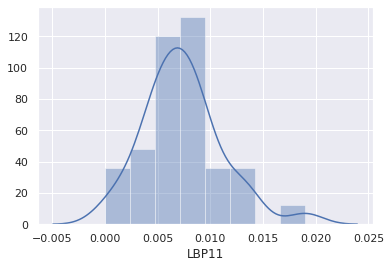

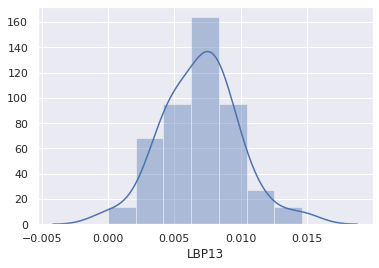

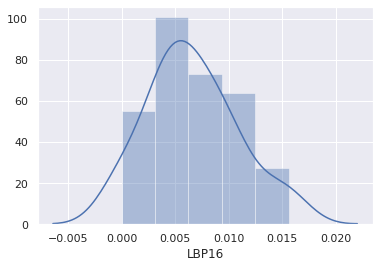

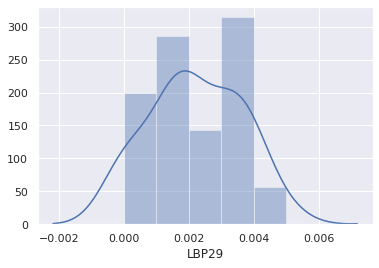

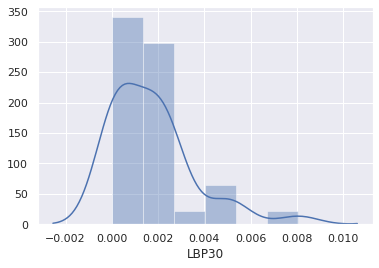

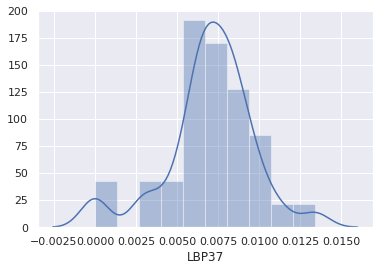

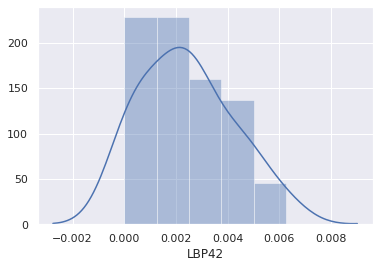

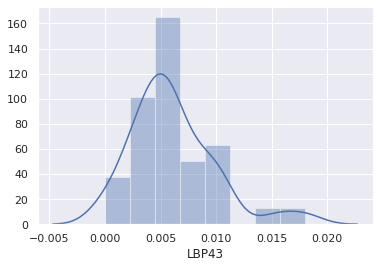

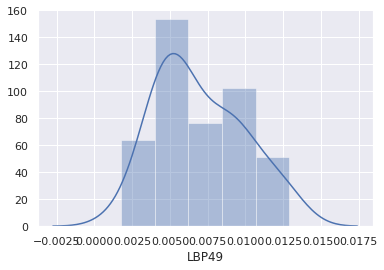

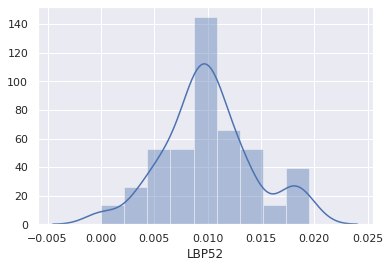

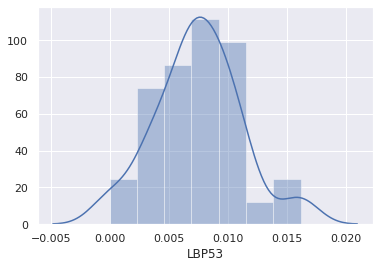

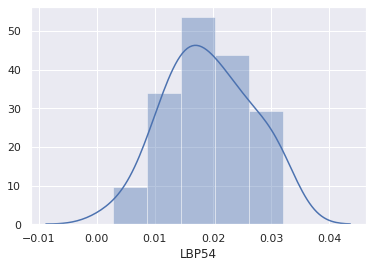

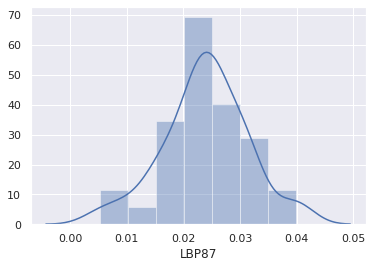

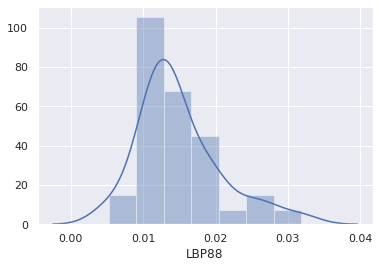

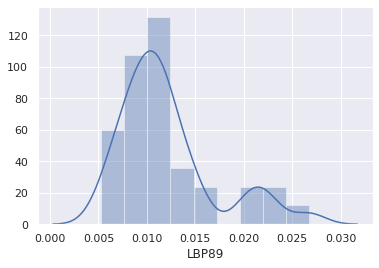

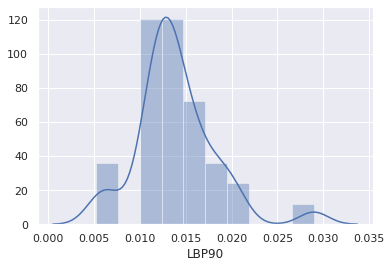

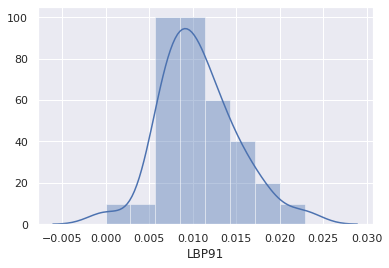

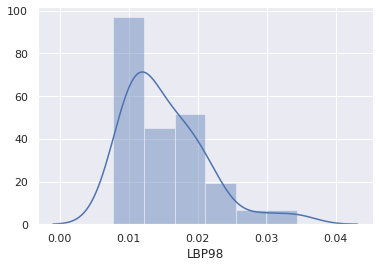

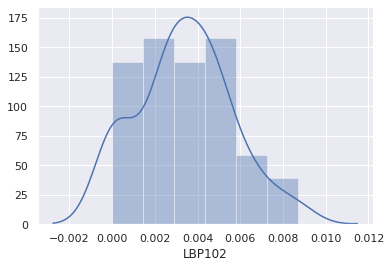

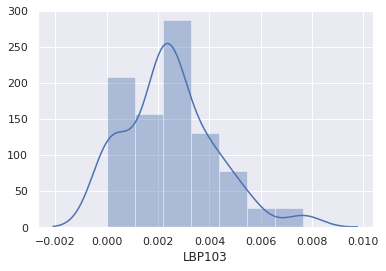

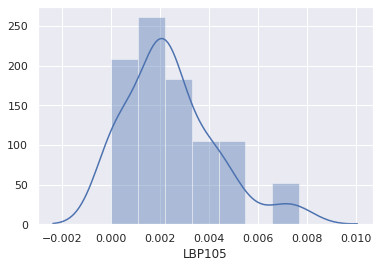

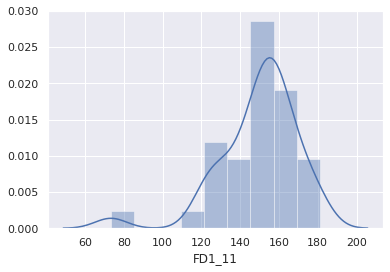

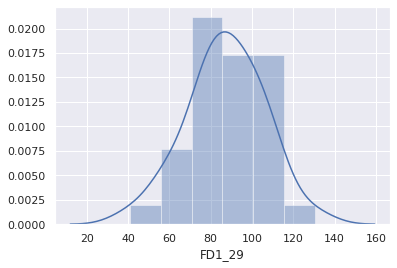

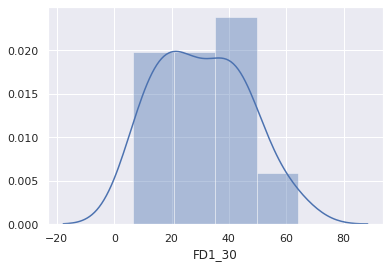

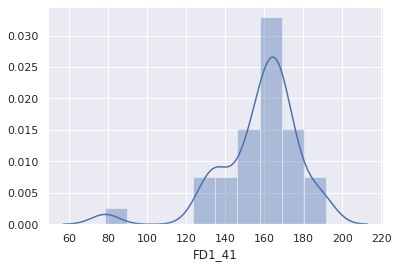

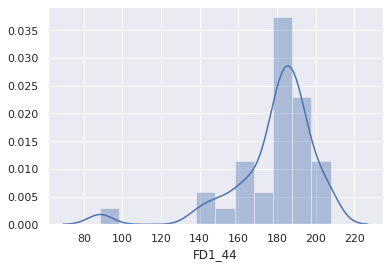

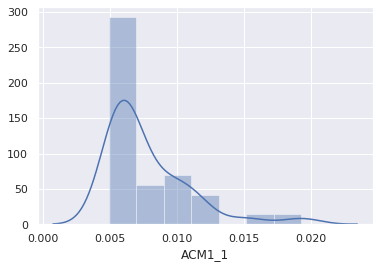

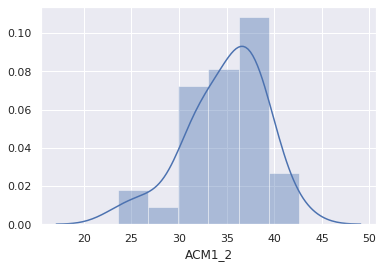

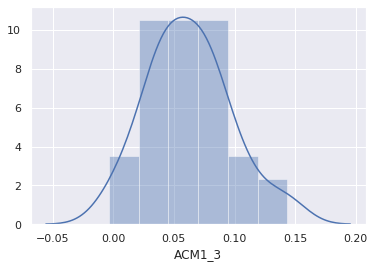

In [9]:
# to plot our radiomic data
radio_data=data.iloc[:,6:] # we are choosing only the radiomic data 
#using a seaborn plot in a library we plot all our radiomic features. 
#the key here is too see if you datasets have some very large outliers.
for i, column in enumerate(radio_data.columns): 
    plt.figure(i)
    sns.distplot(radio_data[column])

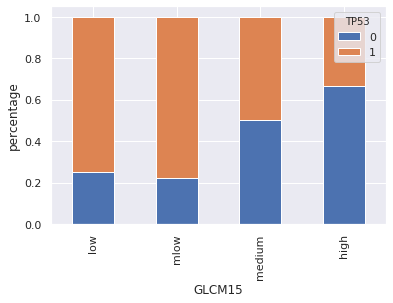

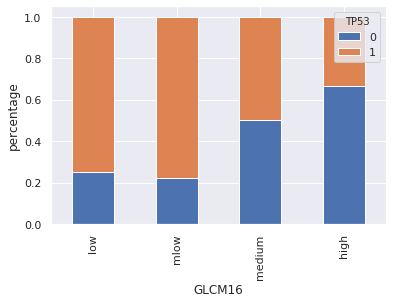

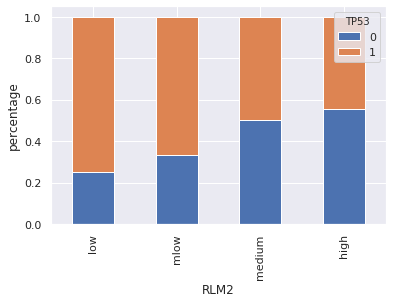

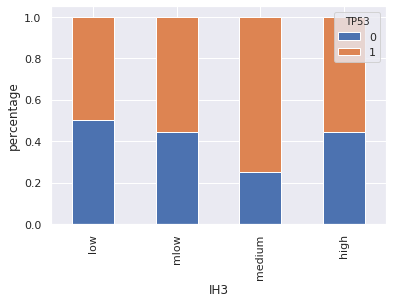

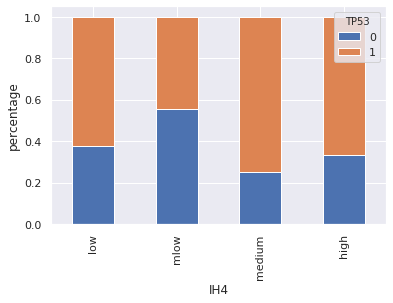

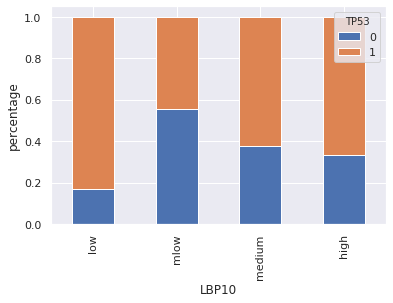

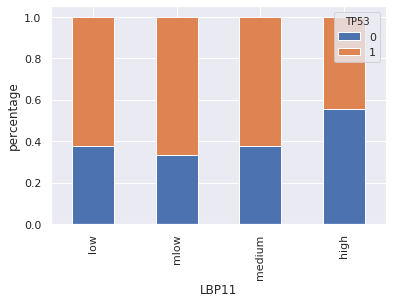

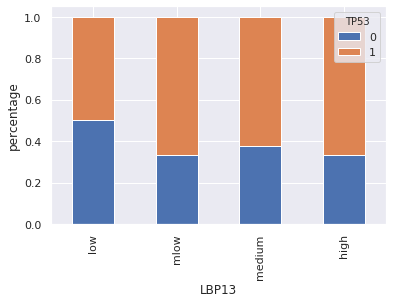

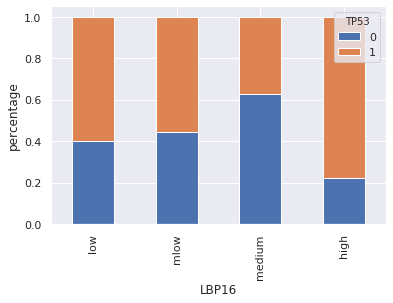

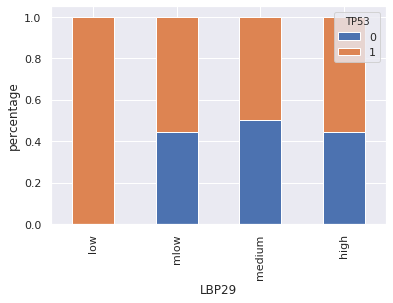

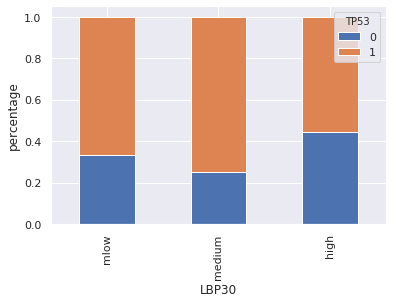

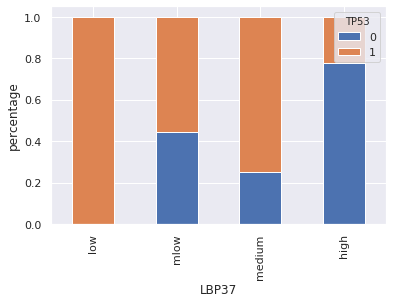

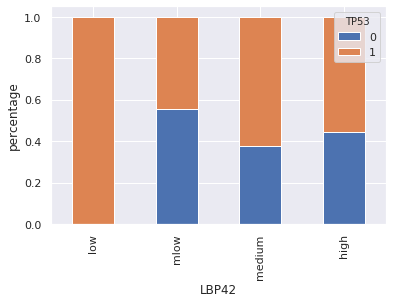

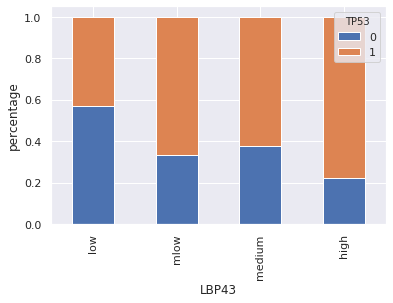

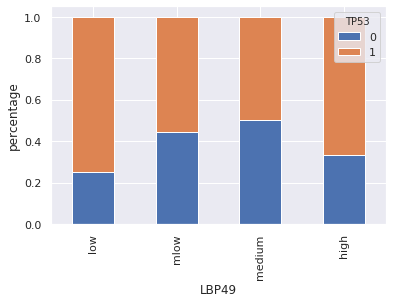

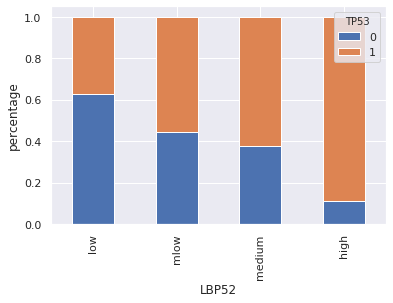

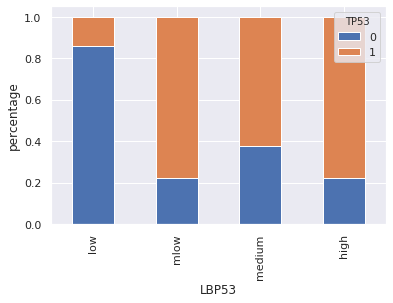

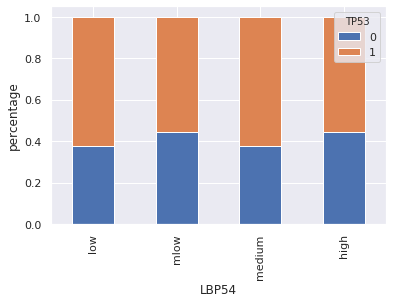

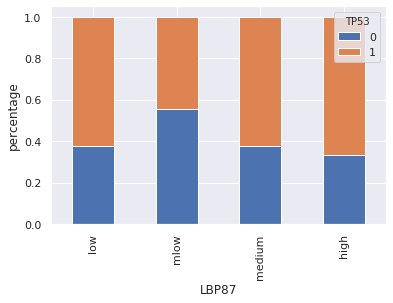

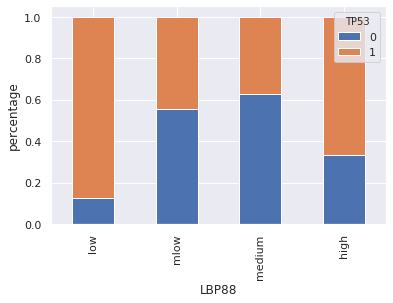

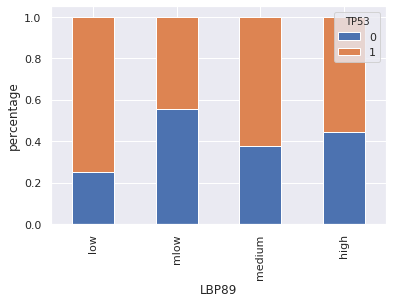

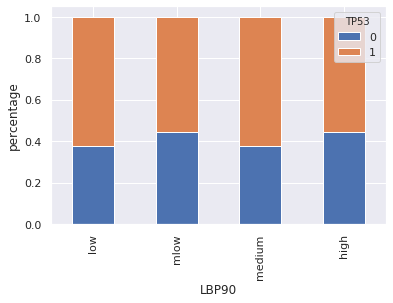

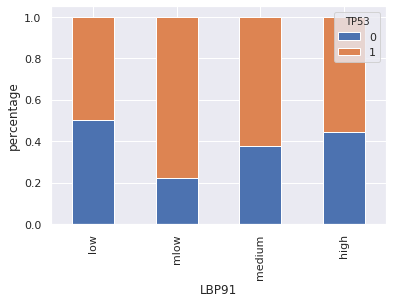

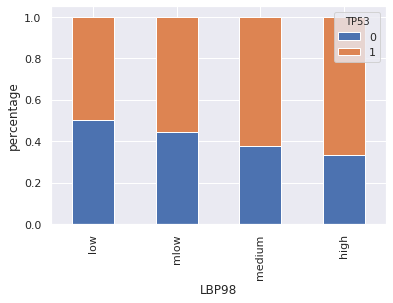

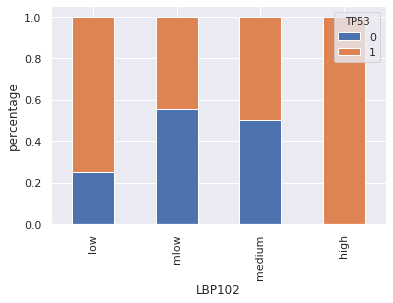

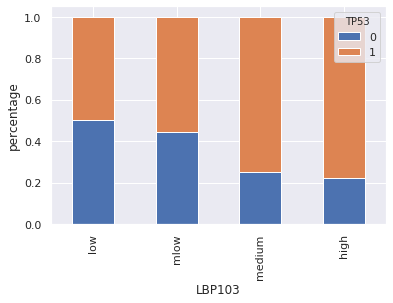

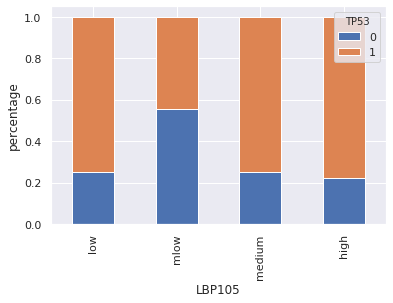

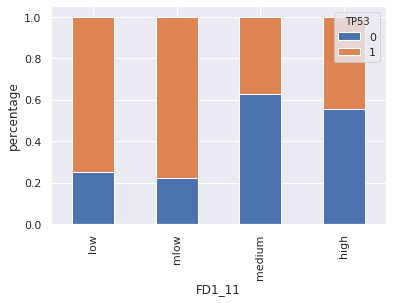

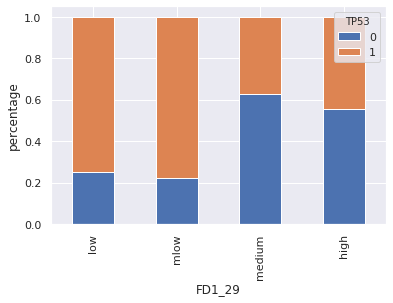

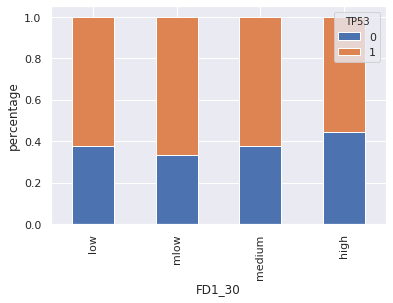

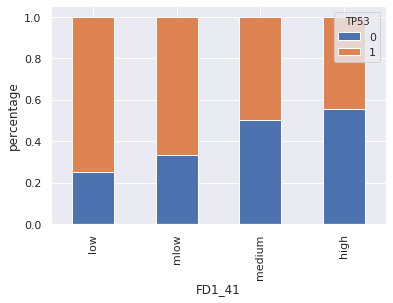

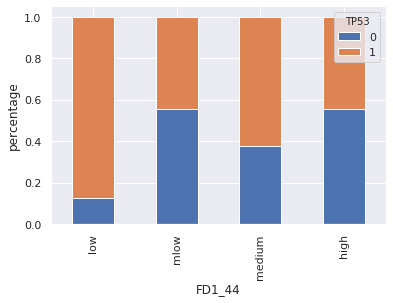

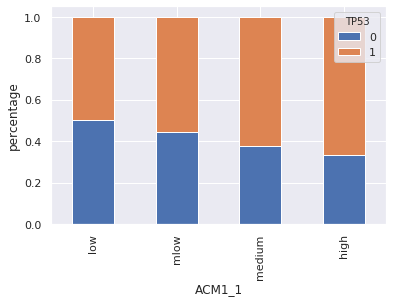

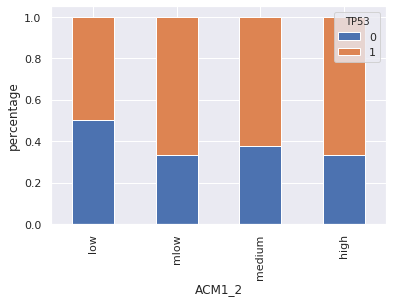

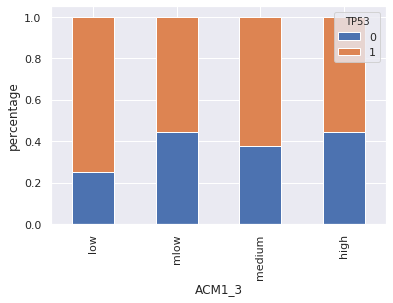

In [10]:
# measuring the relation between the radiomic features and our target variable TP53
radio_temp=radio_data.copy()
haha=radio_temp.describe()
for column, ColData in haha.iteritems():
    bins=[haha[column].iloc[[3][-1]],haha[column].iloc[[4][-1]], 
      haha[column].iloc[[5][-1]], haha[column].iloc[[6][-1]], haha[column].iloc[[7][-1]]]
    bins
    group=['low', 'mlow', 'medium', 'high']
    radio_temp[column+'_bin']=pd.cut(radio_temp[column], bins, labels=group)
    sorting=pd.crosstab(radio_temp[column+'_bin'], data['TP53'])
    sorting.div(sorting.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
    plt.xlabel(column)
    plt.ylabel('percentage')

## Multicolinearity 
we need to check if our data sets is colinear (co-dependent of each other) 


In [11]:
#we can plot the colinearity as the matrix to seeif our data is colinear
#any colinearity above +/- 0.9 is undesirable 
app=data.corr()

app.style.background_gradient(cmap='coolwarm')

### Colinearity 
One of a powerful method to detect the colinearity is Variance inflaction factor (VIF). It measures the R^2 value of each variable as the linear combination of the remaining variables. The VIF= 1/(1-R^2) which means  the larger the VIF the more colinear is the variable 

In [12]:
#print out our radiomic feature names
radio_data.columns

Index(['GLCM15', 'GLCM16', 'RLM2', 'IH3', 'IH4', 'LBP10', 'LBP11', 'LBP13',
       'LBP16', 'LBP29', 'LBP30', 'LBP37', 'LBP42', 'LBP43', 'LBP49', 'LBP52',
       'LBP53', 'LBP54', 'LBP87', 'LBP88', 'LBP89', 'LBP90', 'LBP91', 'LBP98',
       'LBP102', 'LBP103', 'LBP105', 'FD1_11', 'FD1_29', 'FD1_30', 'FD1_41',
       'FD1_44', 'ACM1_1', 'ACM1_2', 'ACM1_3'],
      dtype='object')

In [13]:
#the vif code is presented below and the result indicate that GLCM15 is the most colinear variable 
#It is a good idea to remove one highest VIF variable at the time and rerun this code 
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=radio_data[[ 'GLCM15', 'GLCM16', 'RLM2', 'IH3', 'IH4', 'LBP10', 'LBP11', 'LBP13',
       'LBP16', 'LBP29', 'LBP30', 'LBP37', 'LBP42', 'LBP43', 'LBP49', 'LBP52',
       'LBP53', 'LBP54', 'LBP87', 'LBP88', 'LBP89', 'LBP90', 'LBP91', 'LBP98',
       'LBP102', 'LBP103', 'LBP105', 'FD1_11', 'FD1_29', 'FD1_30', 'FD1_41',
       'FD1_44', 'ACM1_1', 'ACM1_2', 'ACM1_3' ]]
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif

,VIF,Features
0,8.311228e+05,GLCM15
1,2.131863e+05,GLCM16
2,1.323319e+06,RLM2
3,7.952245e+01,IH3
4,1.640285e+04,IH4
5,8.184333e+02,LBP10
6,2.408789e+03,LBP11
7,8.439315e+02,LBP13
8,6.929872e+01,LBP16
9,8.893166e+01,LBP29


In [14]:
#after a series of highly colinear variable have been removed.
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=radio_data[[ 'GLCM16',  'IH3', 'LBP10', 'LBP11', 'LBP13',
       'LBP16', 'LBP29', 'LBP30', 'LBP37', 'LBP42', 'LBP43', 'LBP49', 'LBP52',
       'LBP53', 'LBP54',  'LBP89',   'LBP98',
       'LBP102', 'LBP105',  'FD1_30', 
        'ACM1_1', 'ACM1_3' ]]
vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif

,VIF,Features
0,9.034207,GLCM16
1,4.524074,IH3
2,19.794647,LBP10
3,35.704453,LBP11
4,39.904495,LBP13
5,22.275194,LBP16
6,10.002554,LBP29
7,5.234992,LBP30
8,38.517553,LBP37
9,15.403944,LBP42


## Feature selection
now we need to reanalyze if the remaining variable have influence on the target variable.

In [24]:
#creating new dataframes for our non-colinear data
X= radio_data[[ 'GLCM16',  'IH3', 'LBP10', 'LBP11', 'LBP13',
       'LBP16', 'LBP29', 'LBP30', 'LBP37', 'LBP42', 'LBP43', 'LBP49', 'LBP52',
       'LBP53', 'LBP54',  'LBP89',   'LBP98',
       'LBP102', 'LBP105',  'FD1_30', 
        'ACM1_1', 'ACM1_3']]
y=data['TP53']


In this one, we are using the backward elimination to obtain the best possible features. 
The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.

In [25]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE) # printing the features with 

['LBP13', 'LBP37', 'LBP52', 'LBP53', 'LBP98', 'LBP102', 'ACM1_1', 'ACM1_3']


In [22]:
X= radio_data[[ 'LBP13', 'LBP37', 'LBP52', 'LBP53', 'LBP98', 'LBP102', 'ACM1_1', 'ACM1_3']]
y=data['TP53']

## Machine learning methods


 1 of kfold 5
accuracy score is 0.88 and the  confusion matrix is [[2 1]
 [0 5]],  sensitivity is 1.00 specificity is 0.67


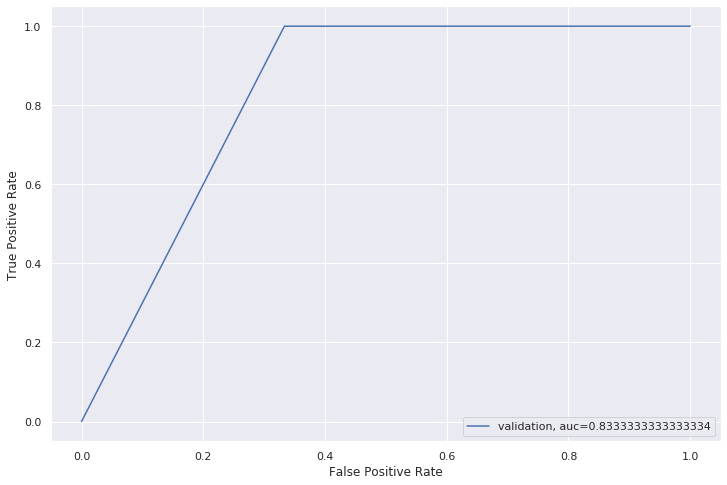


 2 of kfold 5
accuracy score is 0.57 and the  confusion matrix is [[0 3]
 [0 4]],  sensitivity is 1.00 specificity is 0.00


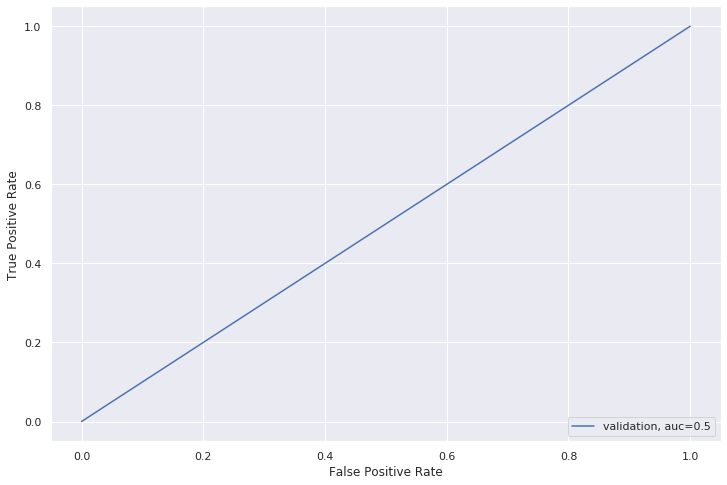


 3 of kfold 5
accuracy score is 0.43 and the  confusion matrix is [[2 1]
 [3 1]],  sensitivity is 0.25 specificity is 0.67


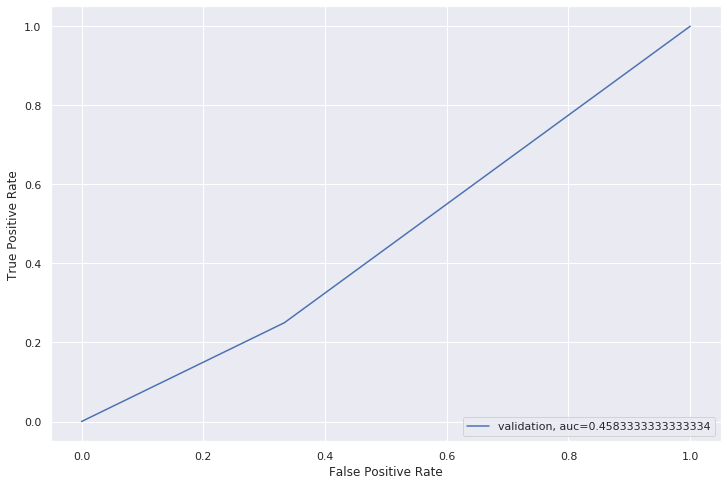


 4 of kfold 5
accuracy score is 0.86 and the  confusion matrix is [[2 1]
 [0 4]],  sensitivity is 1.00 specificity is 0.67


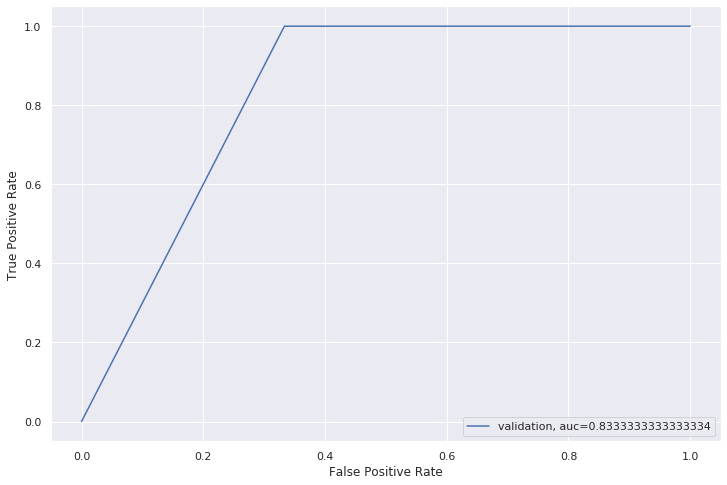


 5 of kfold 5
accuracy score is 0.67 and the  confusion matrix is [[0 2]
 [0 4]],  sensitivity is 1.00 specificity is 0.00


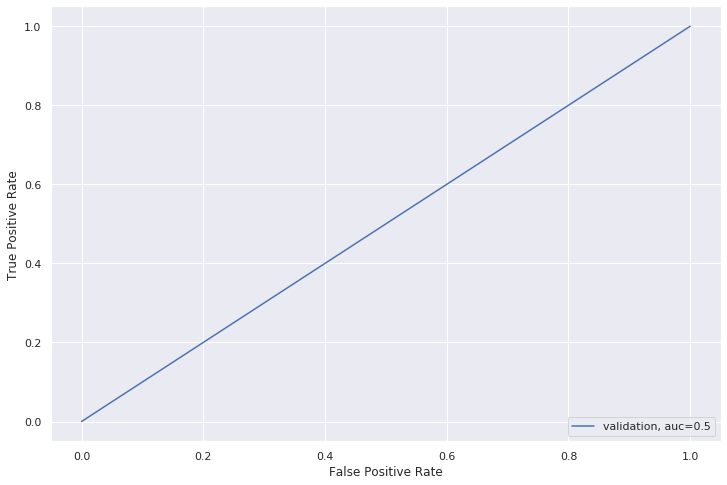

In [23]:
#Baysean model wrapped in the Kfold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

i=1 
kf=StratifiedKFold(n_splits=5, random_state=2,shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits)) 
    x_train, x_test=X.loc[train_index], X.loc[test_index]
    y_train, y_test=y[train_index], y[test_index]
    model=GaussianNB()
    model.fit(x_train, y_train)
    pred_test=model.predict(x_test)
    score=accuracy_score(y_test, pred_test)
    confmat=confusion_matrix(y_test, pred_test)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_test).ravel()
    spec=tn/(tn+fp)
    sens=tp/(tp+fn)
    print ('accuracy score is %.2f and the  confusion matrix is %s,  sensitivity is %.2f specificity is %.2f' 
           %( score, confmat,  sens, spec))
    from sklearn import metrics
    fpr, tpr, _ = metrics.roc_curve(y_test,  pred_test) 
    auc = metrics.roc_auc_score(y_test, pred_test) 
    plt.figure(figsize=(12,8)) 
    plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.legend(loc=4) 
    plt.show()
    i=i+1


we will filter the data by focusing on the correlation between the radiomic data and the target SMAD4. 


## Machine learning models


 1 of kfold 5
accuracy score is 0.62 and the  confusion matrix is [[0 3]
 [0 5]],  sensitivity is 1.00 specificity is 0.00


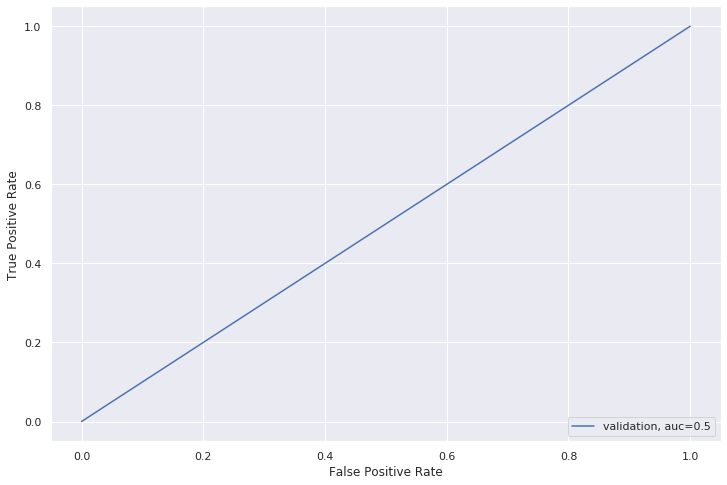


 2 of kfold 5
accuracy score is 0.57 and the  confusion matrix is [[3 0]
 [3 1]],  sensitivity is 0.25 specificity is 1.00


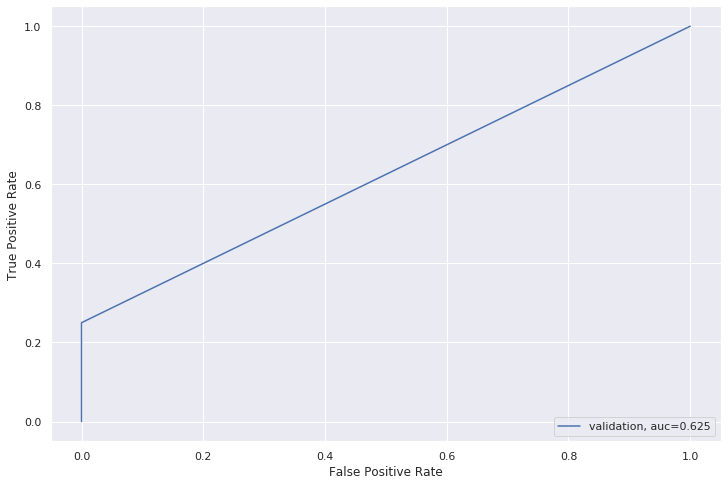


 3 of kfold 5
accuracy score is 0.86 and the  confusion matrix is [[2 1]
 [0 4]],  sensitivity is 1.00 specificity is 0.67


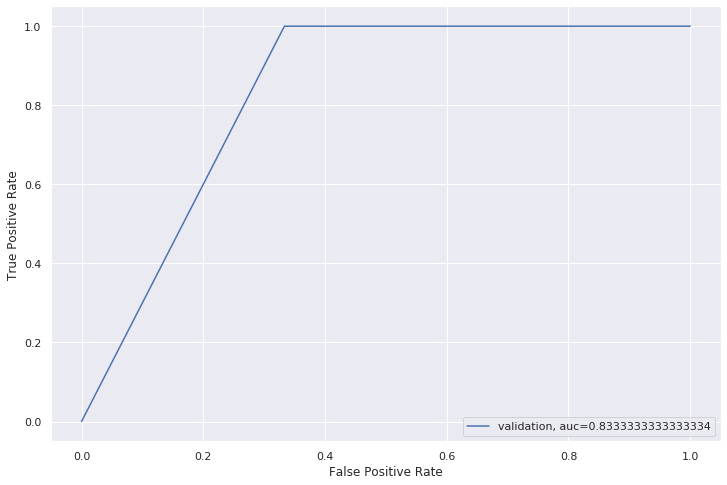


 4 of kfold 5
accuracy score is 0.57 and the  confusion matrix is [[1 2]
 [1 3]],  sensitivity is 0.75 specificity is 0.33


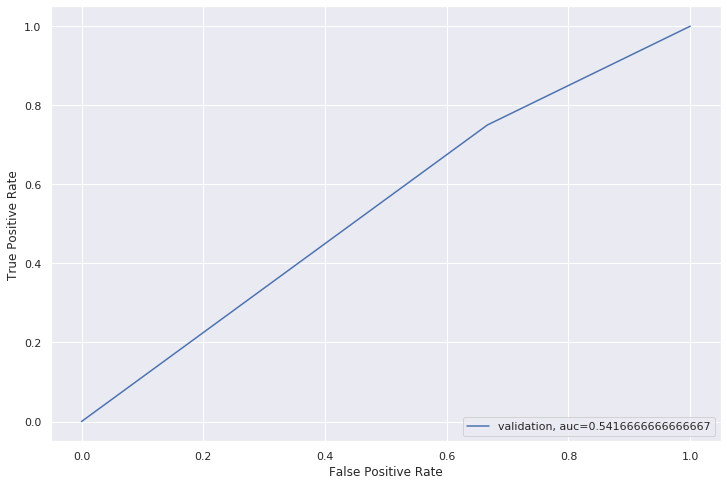


 5 of kfold 5
accuracy score is 0.67 and the  confusion matrix is [[0 2]
 [0 4]],  sensitivity is 1.00 specificity is 0.00


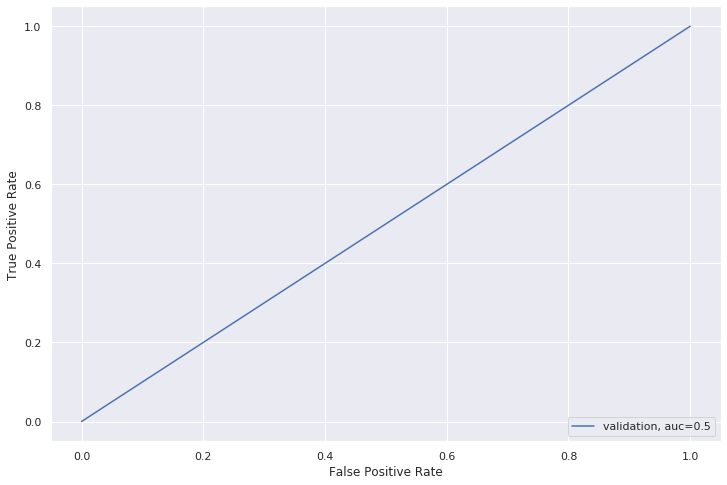

In [16]:
#Baysean model wrapped in the Kfold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

i=1 
kf=StratifiedKFold(n_splits=5, random_state=2,shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits)) 
    x_train, x_test=X.loc[train_index], X.loc[test_index]
    y_train, y_test=y[train_index], y[test_index]
    model=GaussianNB()
    model.fit(x_train, y_train)
    pred_test=model.predict(x_test)
    score=accuracy_score(y_test, pred_test)
    confmat=confusion_matrix(y_test, pred_test)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_test).ravel()
    spec=tn/(tn+fp)
    sens=tp/(tp+fn)
    print ('accuracy score is %.2f and the  confusion matrix is %s,  sensitivity is %.2f specificity is %.2f' 
           %( score, confmat,  sens, spec))
    from sklearn import metrics
    fpr, tpr, _ = metrics.roc_curve(y_test,  pred_test) 
    auc = metrics.roc_auc_score(y_test, pred_test) 
    plt.figure(figsize=(12,8)) 
    plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.legend(loc=4) 
    plt.show()
    i=i+1



 1 of kfold 5
accuracy score is 0.50 and the  confusion matrix is [[1 2]
 [2 3]], F1 score is 0.60, recall score is 0.60, Roc score is 0.47


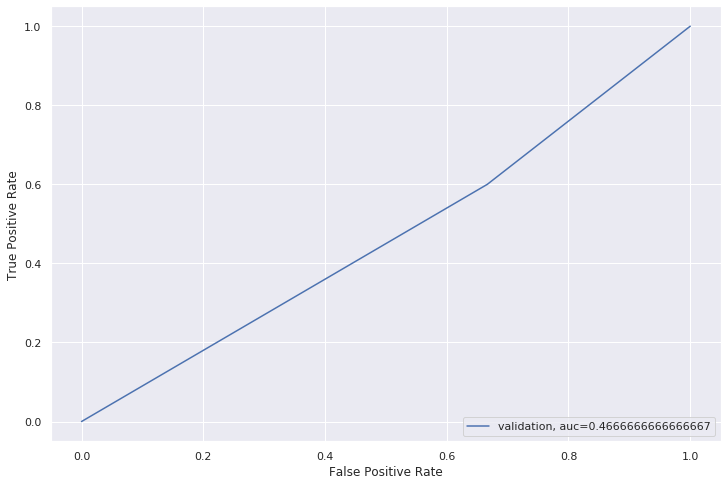


 2 of kfold 5
accuracy score is 0.57 and the  confusion matrix is [[1 2]
 [1 3]], F1 score is 0.67, recall score is 0.75, Roc score is 0.54


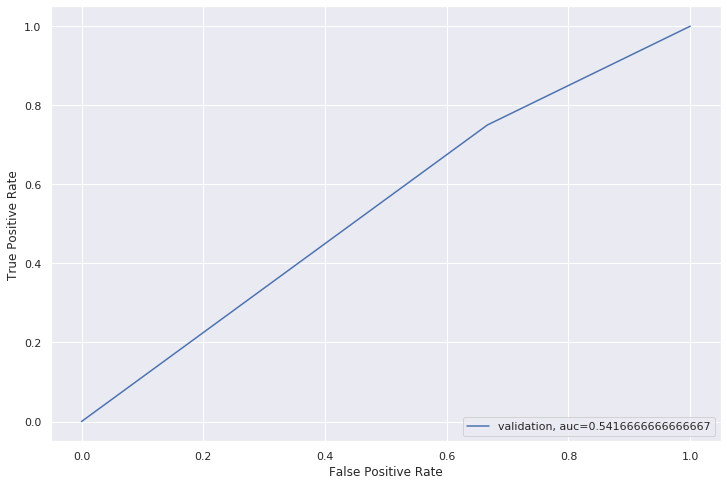


 3 of kfold 5
accuracy score is 0.43 and the  confusion matrix is [[0 3]
 [1 3]], F1 score is 0.60, recall score is 0.75, Roc score is 0.38


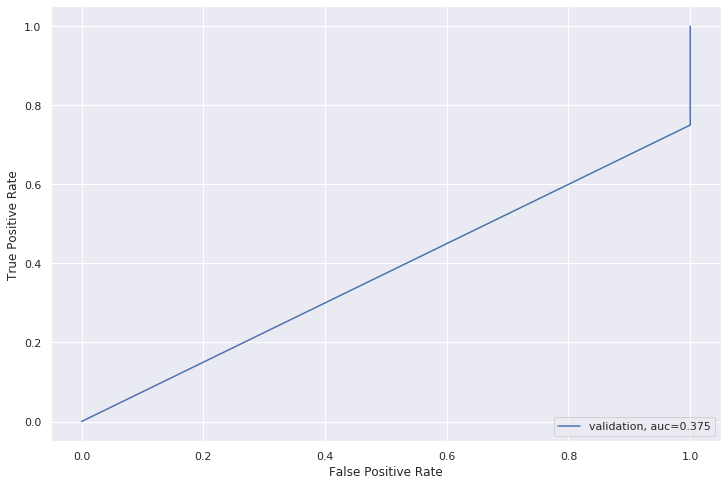


 4 of kfold 5
accuracy score is 0.43 and the  confusion matrix is [[1 2]
 [2 2]], F1 score is 0.50, recall score is 0.50, Roc score is 0.42


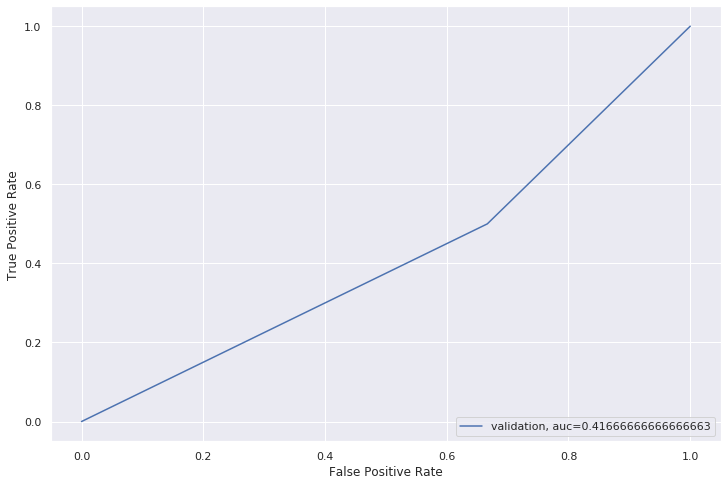


 5 of kfold 5
accuracy score is 0.33 and the  confusion matrix is [[0 2]
 [2 2]], F1 score is 0.50, recall score is 0.50, Roc score is 0.25


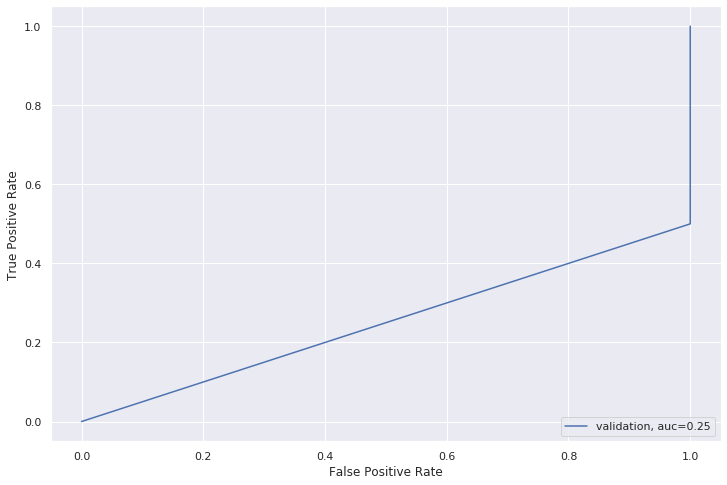

In [26]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
i=1 
kf=StratifiedKFold(n_splits=5, random_state=42,shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits)) 
    x_train, x_test=X.loc[train_index], X.loc[test_index]
    y_train, y_test=y[train_index], y[test_index]
    model=XGBClassifier(n_estimators=20, max_depth=4)
    model.fit(x_train, y_train)
    pred_test=model.predict(x_test)
    score=accuracy_score(y_test, pred_test)
    confmat=confusion_matrix(y_test, pred_test)
    fscore=f1_score(y_test, pred_test)
    recall=recall_score(y_test, pred_test)
    roc_score=roc_auc_score(y_test, pred_test)
    print ('accuracy score is %.2f and the  confusion matrix is %s, F1 score is %.2f, recall score is %.2f, Roc score is %.2f'
           %( score, confmat, fscore, recall, roc_score))
    from sklearn import metrics
    fpr, tpr, _ = metrics.roc_curve(y_test,  pred_test) 
    auc = metrics.roc_auc_score(y_test, pred_test) 
    plt.figure(figsize=(12,8)) 
    plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.legend(loc=4) 
    plt.show()
    i=i+1


 1 of kfold 5
accuracy score is 0.75 and the  confusion matrix is [[1 2]
 [0 5]], F1 score is 0.83, recall score is 1.00


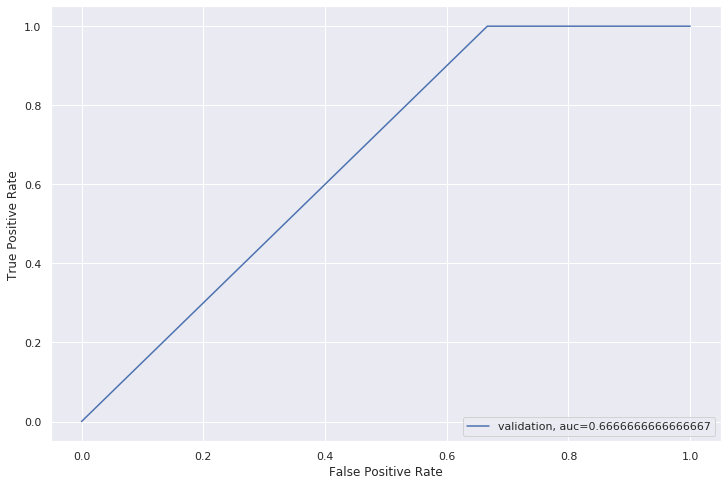


 2 of kfold 5
accuracy score is 0.43 and the  confusion matrix is [[0 3]
 [1 3]], F1 score is 0.60, recall score is 0.75


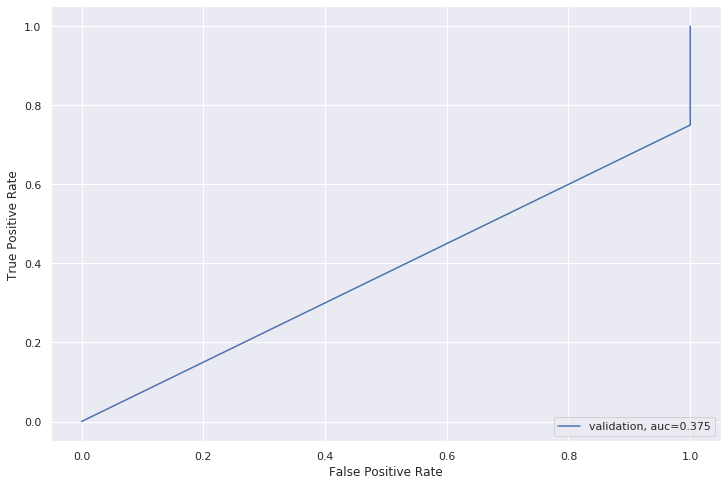


 3 of kfold 5
accuracy score is 0.71 and the  confusion matrix is [[1 2]
 [0 4]], F1 score is 0.80, recall score is 1.00


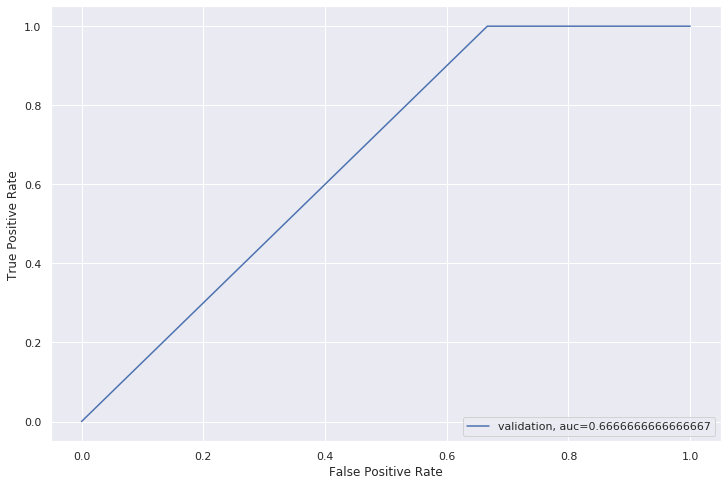


 4 of kfold 5
accuracy score is 0.57 and the  confusion matrix is [[0 3]
 [0 4]], F1 score is 0.73, recall score is 1.00


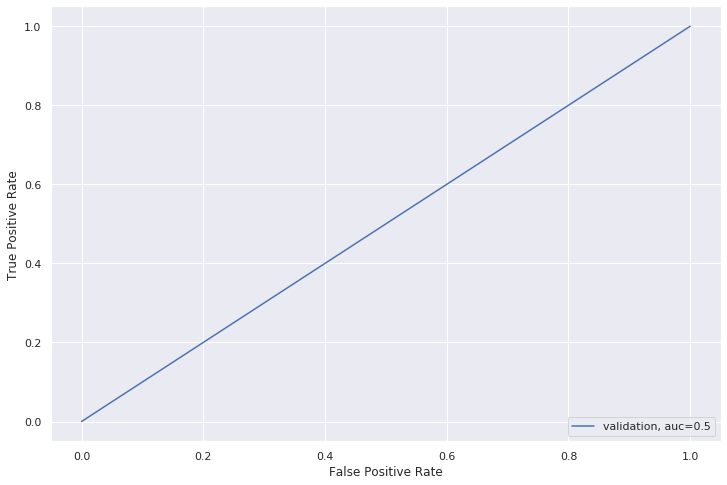


 5 of kfold 5
accuracy score is 0.83 and the  confusion matrix is [[2 0]
 [1 3]], F1 score is 0.86, recall score is 0.75


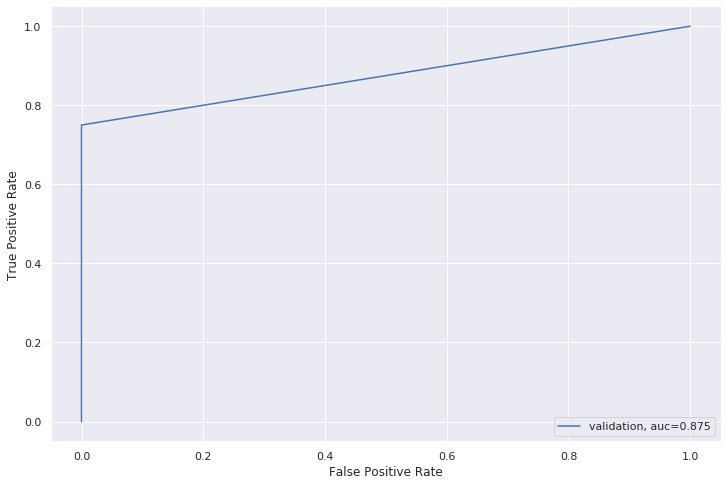

In [18]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
i=1 
kf=StratifiedKFold(n_splits=5, random_state=4,shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits)) 
    x_train, x_test=X.loc[train_index], X.loc[test_index]
    y_train, y_test=y[train_index], y[test_index]
    model=LogisticRegression()
    model.fit(x_train, y_train)
    pred_test=model.predict(x_test)
    score=accuracy_score(y_test, pred_test)
    confmat=confusion_matrix(y_test, pred_test)
    fscore=f1_score(y_test, pred_test)
    recall=recall_score(y_test, pred_test)
    print ('accuracy score is %.2f and the  confusion matrix is %s, F1 score is %.2f, recall score is %.2f' 
           %( score, confmat, fscore, recall))
    i+=1
    from sklearn import metrics
    fpr, tpr, _ = metrics.roc_curve(y_test,  pred_test) 
    auc = metrics.roc_auc_score(y_test, pred_test) 
    plt.figure(figsize=(12,8)) 
    plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.legend(loc=4) 
    plt.show()


 1 of kfold 5
accuracy score is 0.50 and the  confusion matrix is [[1 2]
 [2 3]], F1 score is 0.60, recall score is 0.60


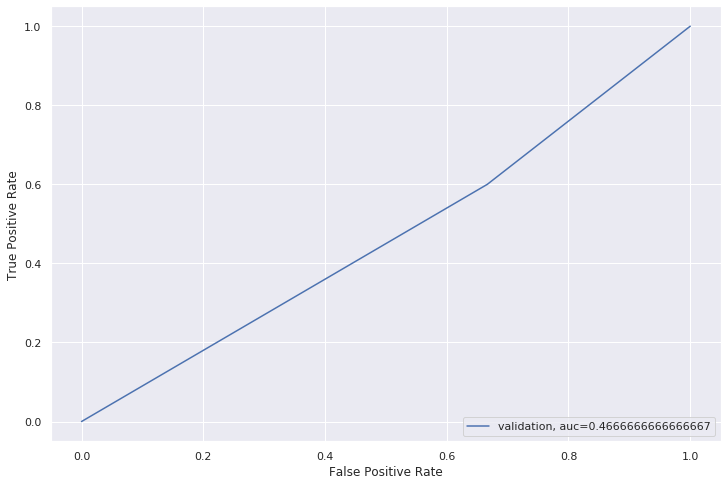


 2 of kfold 5
accuracy score is 0.43 and the  confusion matrix is [[0 3]
 [1 3]], F1 score is 0.60, recall score is 0.75


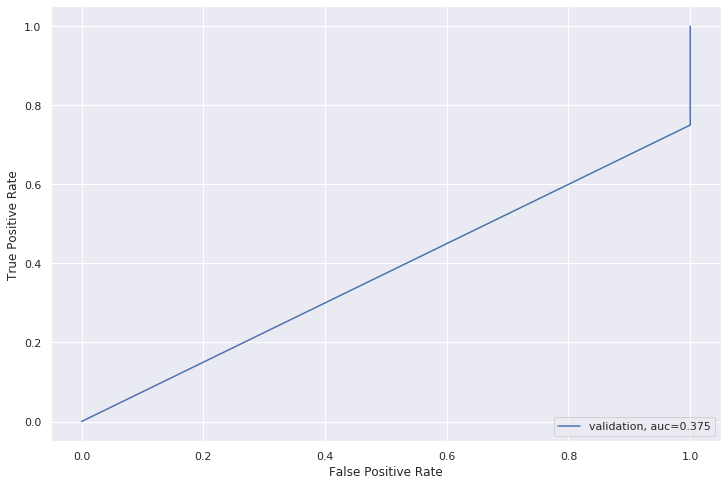


 3 of kfold 5
accuracy score is 0.71 and the  confusion matrix is [[2 1]
 [1 3]], F1 score is 0.75, recall score is 0.75


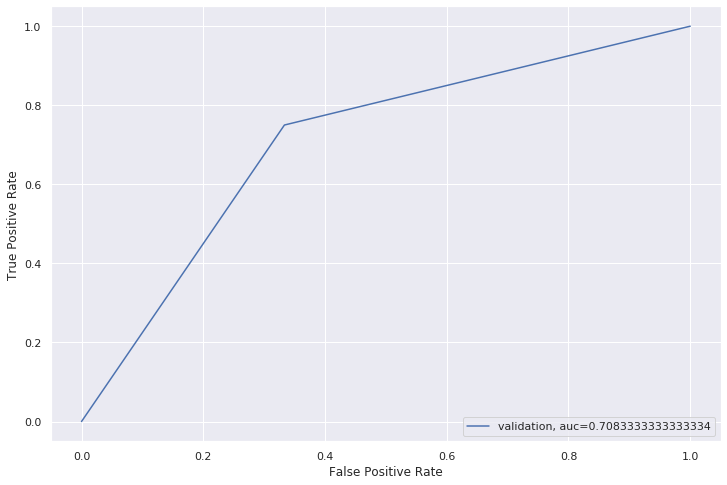


 4 of kfold 5
accuracy score is 0.43 and the  confusion matrix is [[0 3]
 [1 3]], F1 score is 0.60, recall score is 0.75


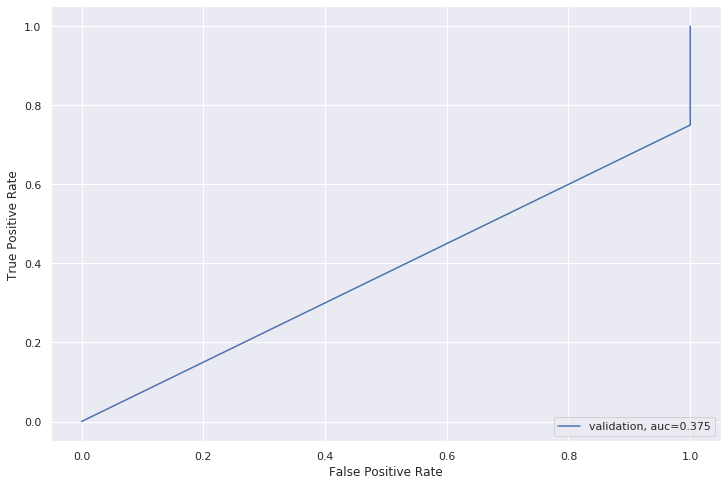


 5 of kfold 5
accuracy score is 0.50 and the  confusion matrix is [[1 1]
 [2 2]], F1 score is 0.57, recall score is 0.50


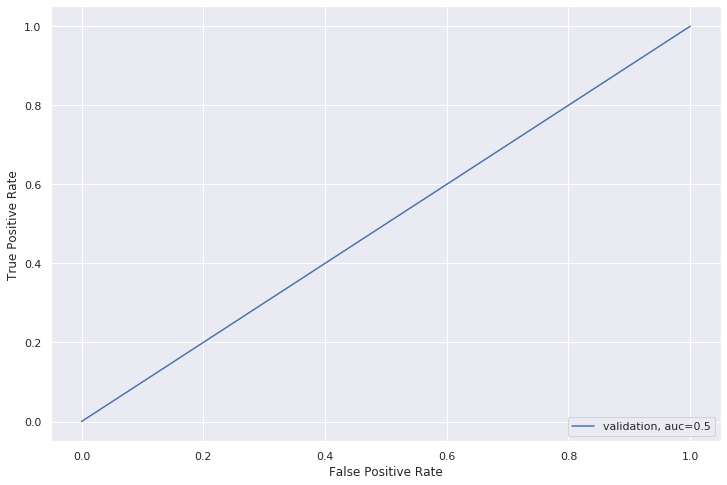

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
i=1 
kf=StratifiedKFold(n_splits=5, random_state=4,shuffle=True)
for train_index, test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits)) 
    x_train, x_test=X.loc[train_index], X.loc[test_index]
    y_train, y_test=y[train_index], y[test_index]
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(x_train, y_train)
    pred_test=model.predict(x_test)
    score=accuracy_score(y_test, pred_test)
    confmat=confusion_matrix(y_test, pred_test)
    fscore=f1_score(y_test, pred_test)
    recall=recall_score(y_test, pred_test)
    print ('accuracy score is %.2f and the  confusion matrix is %s, F1 score is %.2f, recall score is %.2f' 
           %( score, confmat, fscore, recall))
    i+=1
    from sklearn import metrics
    fpr, tpr, _ = metrics.roc_curve(y_test,  pred_test) 
    auc = metrics.roc_auc_score(y_test, pred_test) 
    plt.figure(figsize=(12,8)) 
    plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.legend(loc=4) 
    plt.show()